In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("data/bank-note/train.csv")
test     = pd.read_csv("data/bank-note/test.csv")

X_train = train[train.columns[:-1]]
X_test  = test [test.columns[:-1]]

y_train = train[train.columns[-1]] 
y_test =  test [test.columns[-1]]

In [3]:
print(X_train.head())
print()
print(y_train.head())

        var      skew     curt   entropy
0  3.848100  10.15390 -3.85610  -4.22280
1  4.004700   0.45937  1.36210   1.61810
2 -0.048008  -1.60370  8.47560   0.75558
3 -1.266700   2.81830 -2.42600  -1.88620
4  2.203400   5.99470  0.53009   0.84998

0    0
1    0
2    0
3    1
4    0
Name:  y, dtype: int64


In [120]:
import splearn.Perceptron.Perceptron as perc

p = perc.StdPerceptron()

p.train(
    X_train,
    y_train,
    1000
)

preds = p.predict(X_train)

from splearn.Metrics import accuracy_score

accuracy_score(y_train, preds)

0.8325688073394495

<AxesSubplot:>

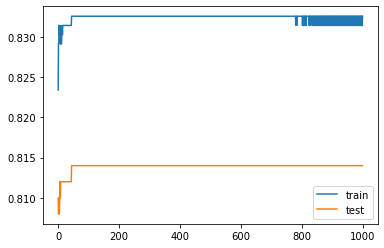

In [125]:
import splearn.Perceptron.Perceptron as perc
from splearn.Metrics import accuracy_score

num_epochs = 1000
data = np.zeros((num_epochs, 2))

p = perc.StdPerceptron()
p.train(
    X_train,
    y_train,
    0
)

for i in range(num_epochs):

    p.add_batch(
        X_train,
        y_train,
        1
    )

    p_train = p.predict(X_train)
    p_test  = p.predict(X_test)

    data[i][0] = accuracy_score(y_train, p_train)
    data[i][1] = accuracy_score(y_test, p_test)

df = pd.DataFrame(data, columns=["train", "test"])
df.plot()